<a href="https://colab.research.google.com/github/goncalves-tiago/testing/blob/master/Trabalho_01_An%C3%A1lise_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Trabalho 01: Análise Multivariada**
Gabriela Pereira de Freitas  
Letícia Constantini Pelicer  
Tiago Gomes Gonçalves


In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import matplotlib_venn as venn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.


%matplotlib inline
sns.set_style('darkgrid')
import datetime as dt

import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [62]:

import io
import seaborn as sbrn
import pandas as pd
import statsmodels.api as sm



In [63]:
from google.colab import files
arquivos = files.upload()


Saving 33hate_crimes.csv to 33hate_crimes (1).csv


**1**. Base de dados: **"FiveThirtyEight Hate Crimes Dataset"** (33hatecrimes.csv)

Disponível em: *https://www.kaggle.com/fivethirtyeight/fivethirtyeight-hate-crimes-dataset*

Artigo: *'https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/*

Pergunta de análise: 
***Taxas mais altas de crimes de ódio estão vinculadas à desigualdade de renda?***



In [64]:
hatecrimes = pd.read_csv(io.StringIO(arquivos['33hate_crimes.csv'].decode('utf-8')))
hatecrimes.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


Apresentação variáveis

In [ ]:
hatecrimes.dtypes

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
dtype: object

**2**. Apresente um resumo da base de dados incluindo estatísticas descritivas das principais variáveis:

+ 2.1  Ilustre com tabelas e gráficos as características das variáveis principais.

+ 2.2  Comente as características de forma a destacar principais informações e evidenciar necessidade de explorar os dados com estatística multivariada.

In [65]:
hatecrimes.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
count,51.000000,51.000000,51.000000,51.000000,48.000000,51.000000,51.000000,51.000000,51.00000,47.000000,50.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613
std,9208.478170,0.010698,0.181587,0.034073,0.031077,0.024715,0.020891,0.164915,0.11871,0.252709,1.714245
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.142707,1.293139
50%,54916.000000,0.051000,0.790000,0.874000,0.045000,0.090000,0.454000,0.280000,0.49000,0.226197,1.987068
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.356935,3.184344
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480


<Figure size 720x480 with 0 Axes>

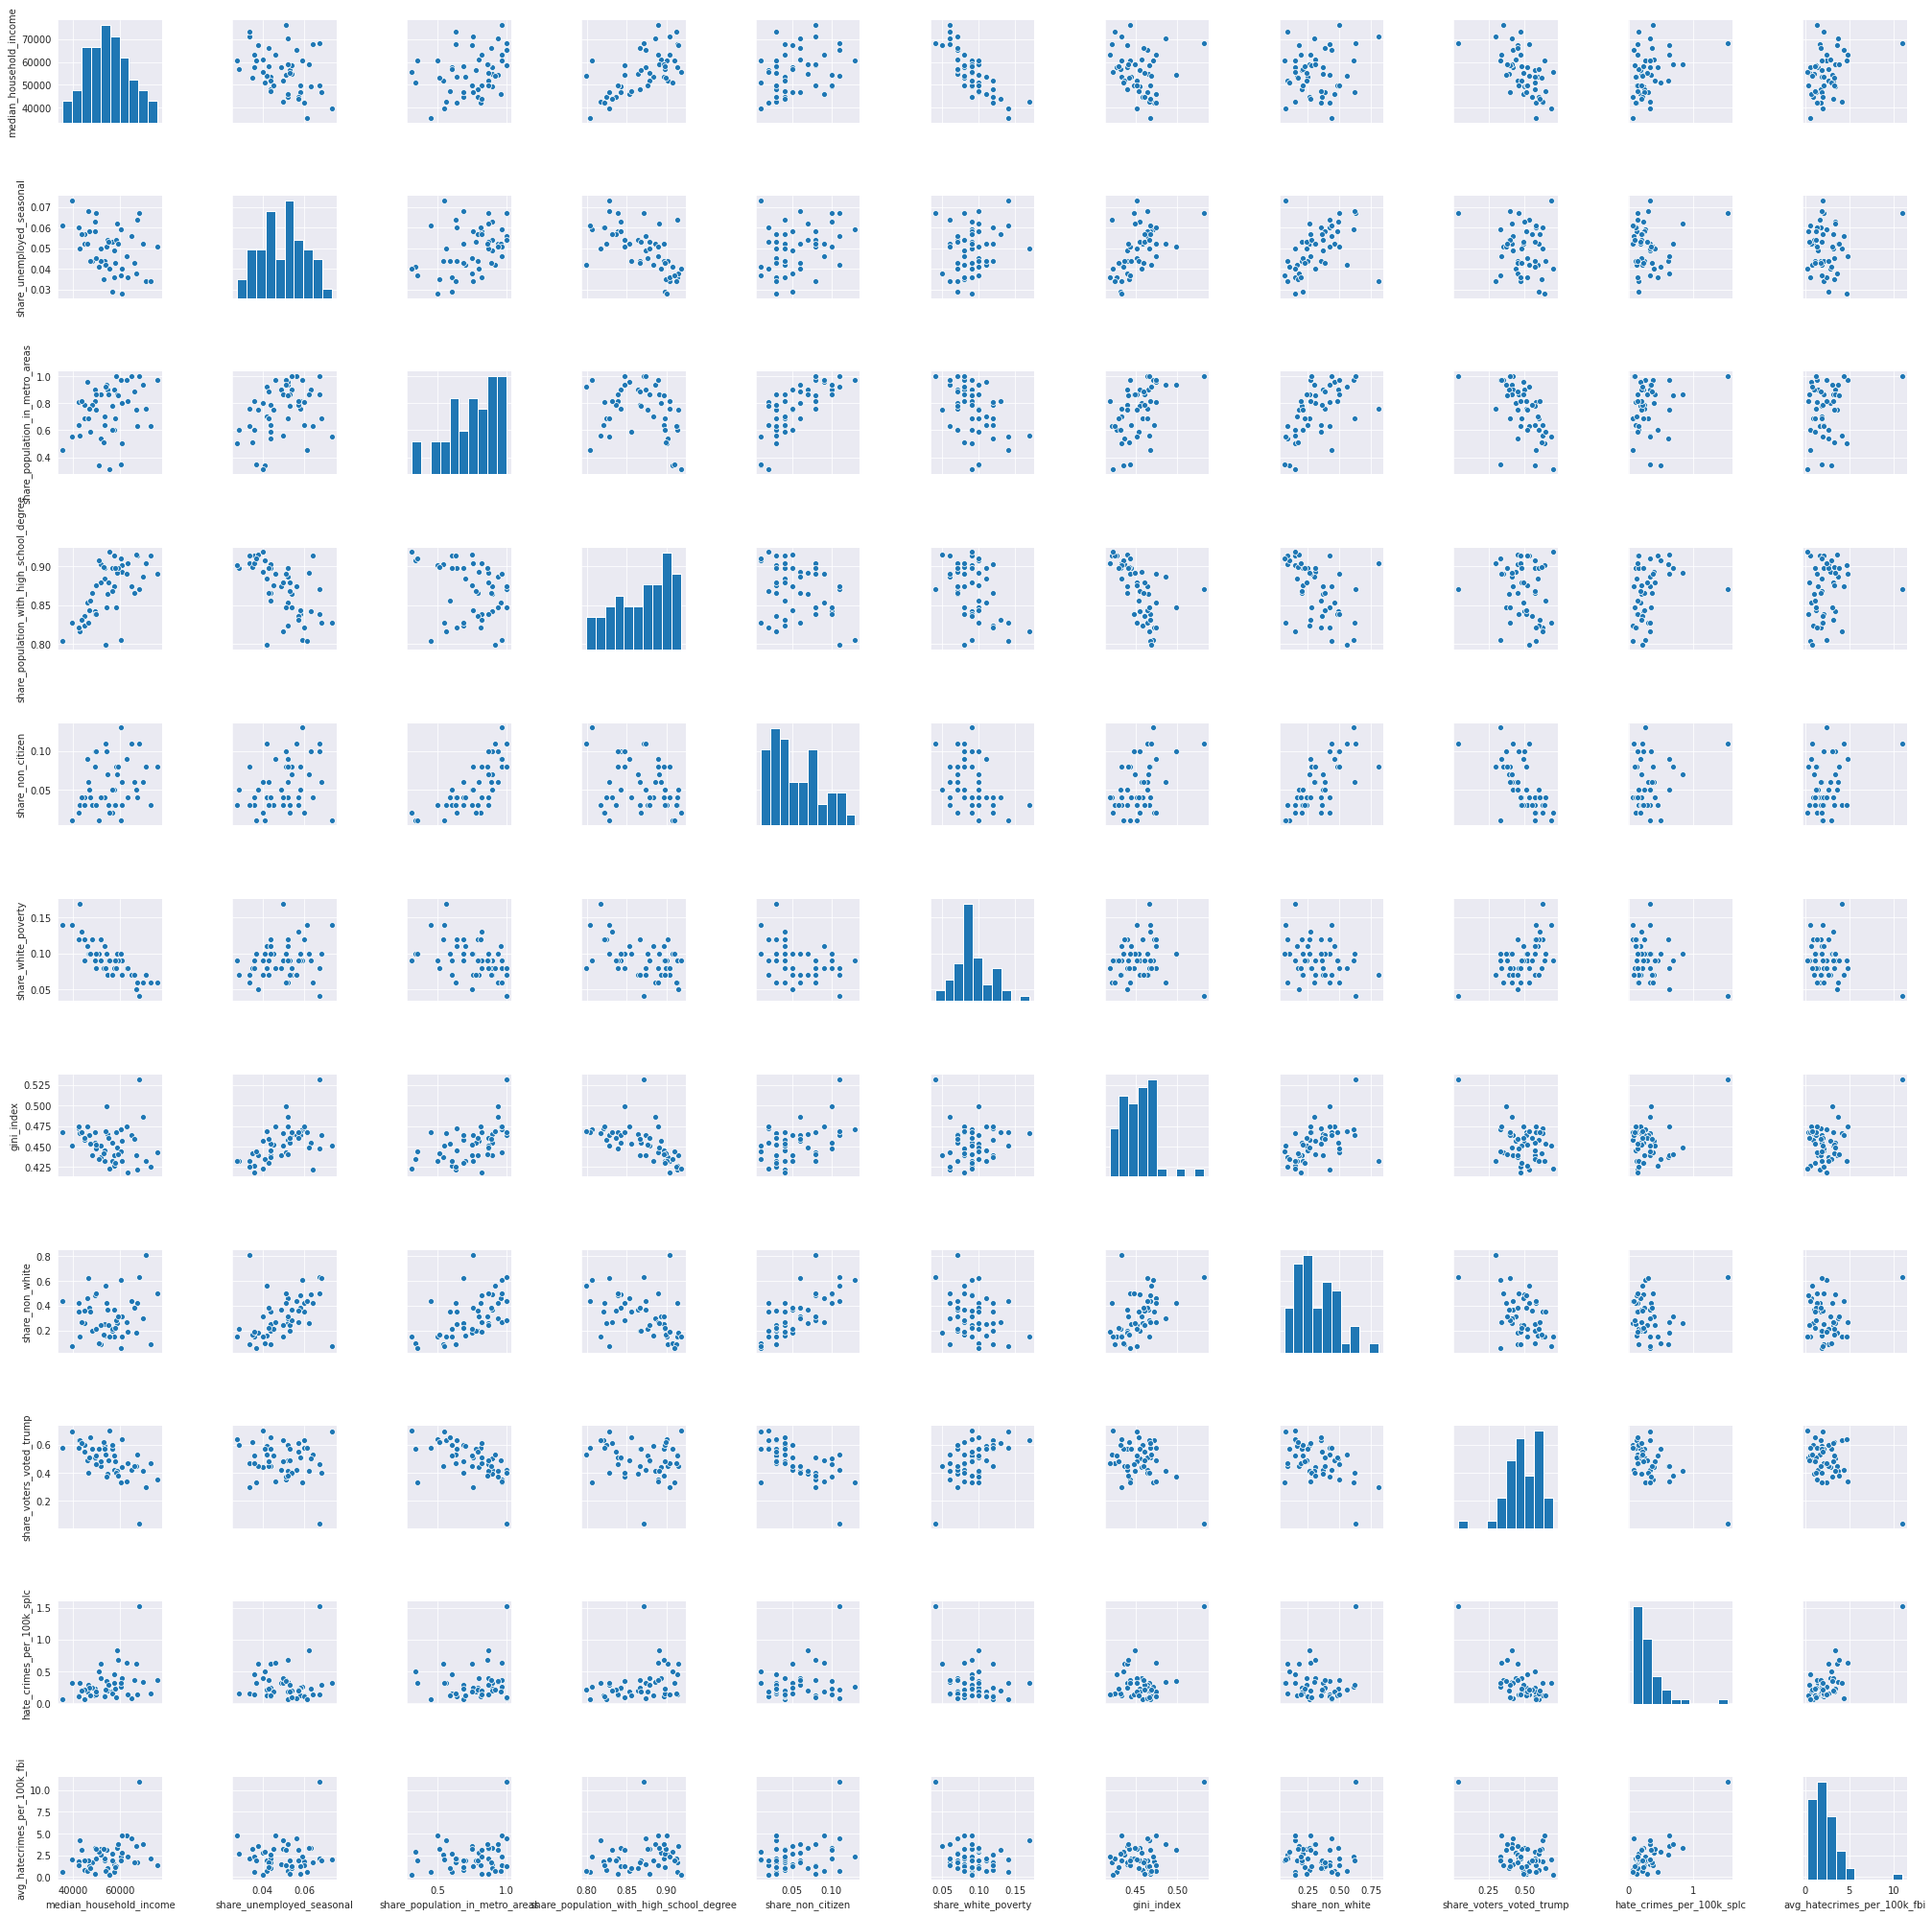

In [66]:
plt.figure(dpi=120)
sns.pairplot(hatecrimes)
plt.show()

**3**.A partir do item 2, construa gráficos de forma a obter um conteúdo para o assunto, uma “história” a partir dos dados. Destaque análises de interesse que envolvam duas ou mais variáveis em conjunto.

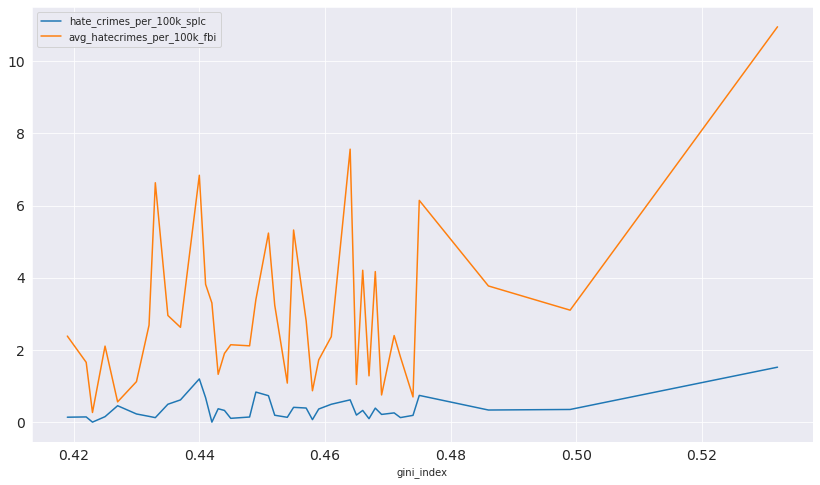

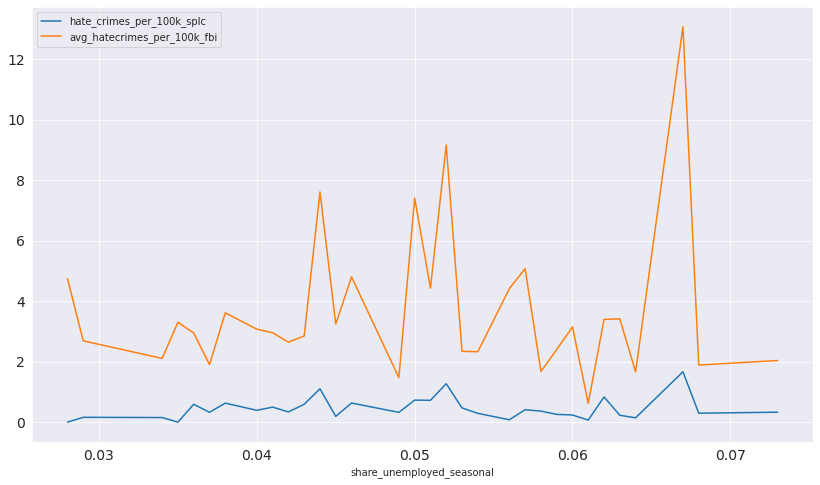

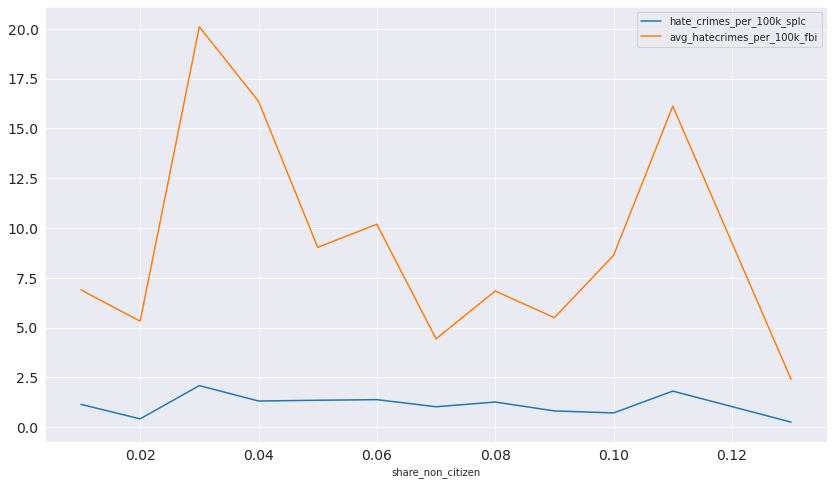

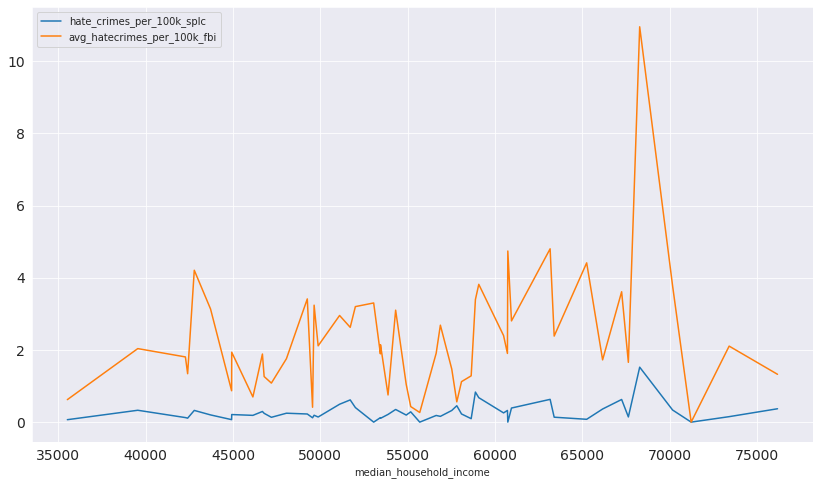

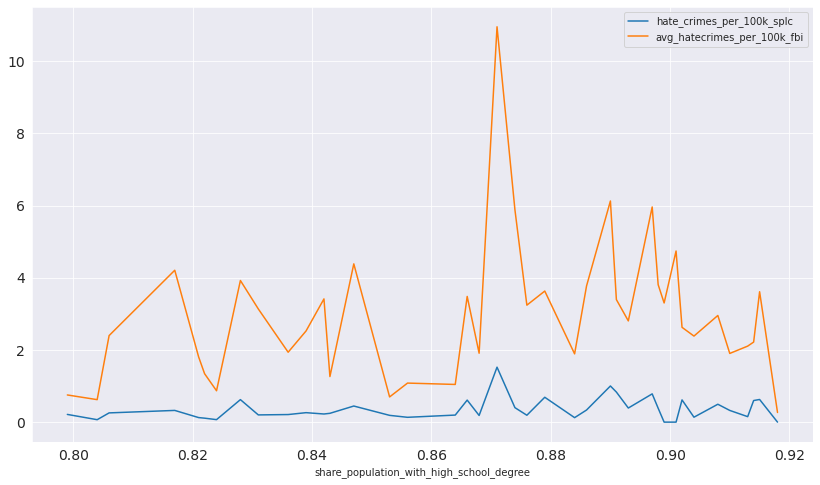

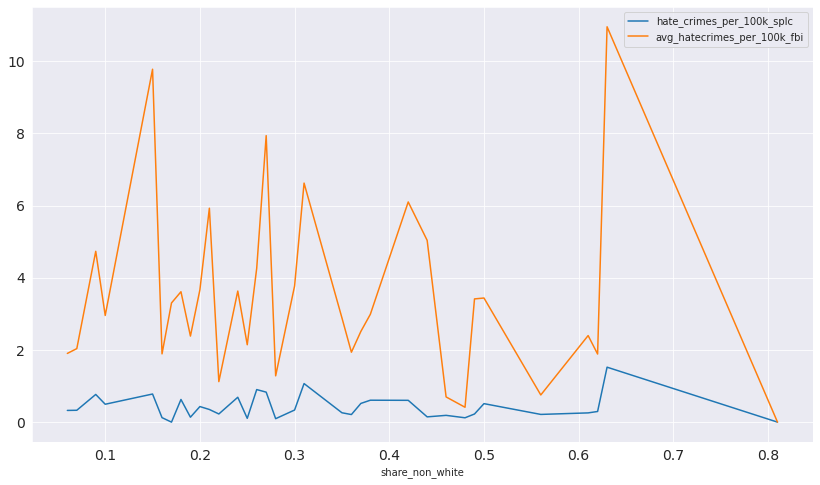

In [74]:
gini = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.gini_index).sum()
gini.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

unem = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.share_unemployed_seasonal).sum()
unem.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

citz = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.share_non_citizen).sum()
citz.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

income = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.median_household_income).sum()
income.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

degree = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.share_population_with_high_school_degree).sum()
degree.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

white = hatecrimes[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].groupby(hatecrimes.share_non_white).sum()
white.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()







Text(0.5, 1.0, 'Share of adults 25 and older with a high-school degree, 2009 by state')

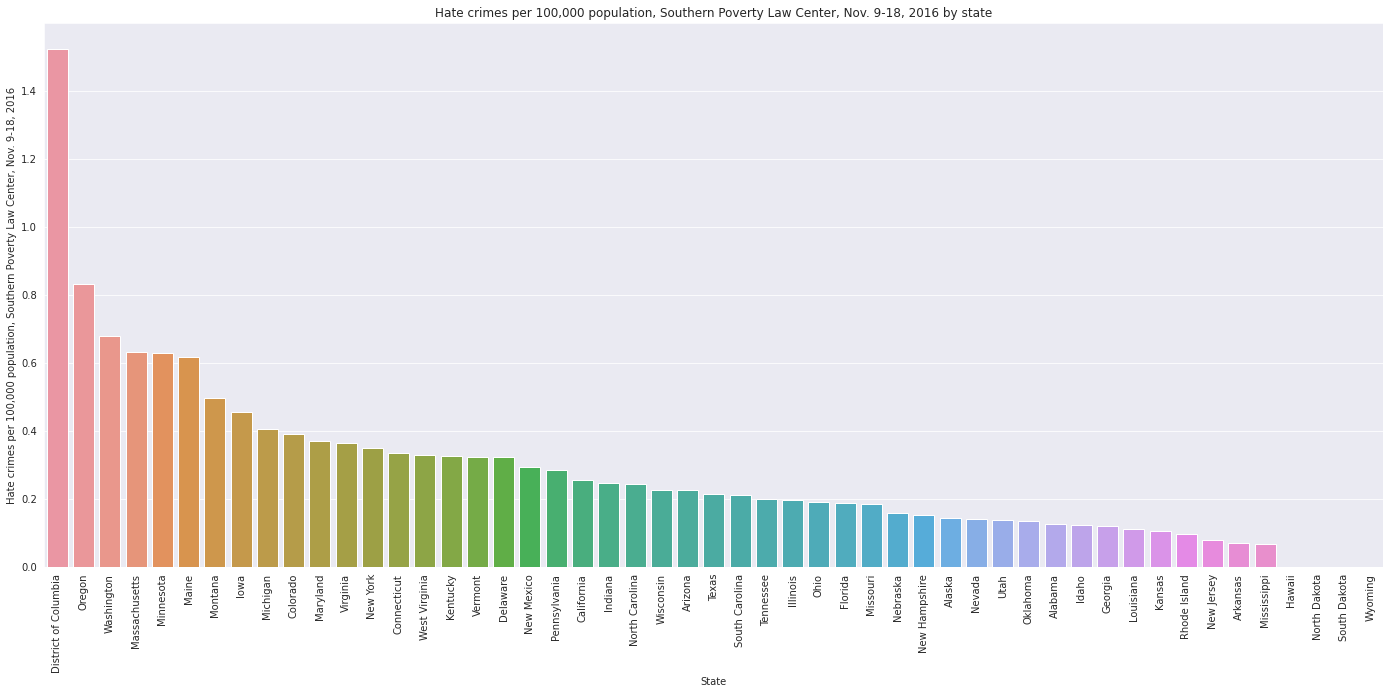

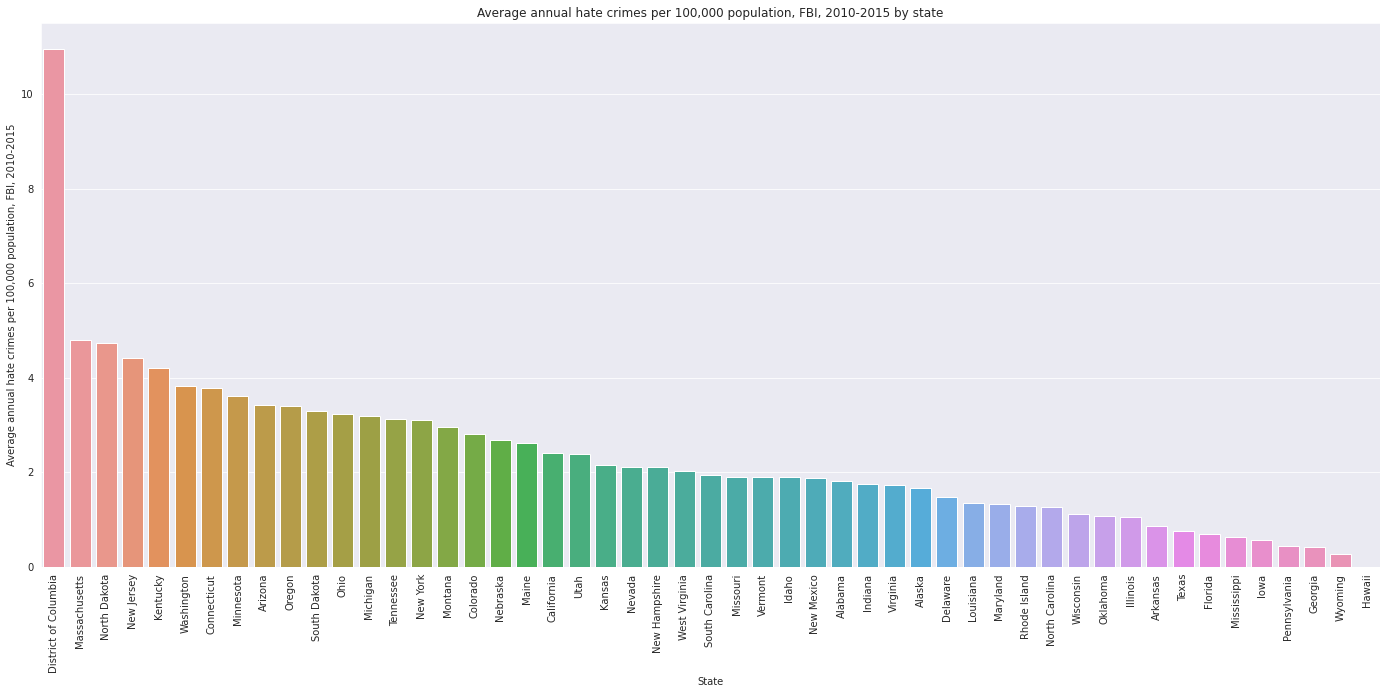

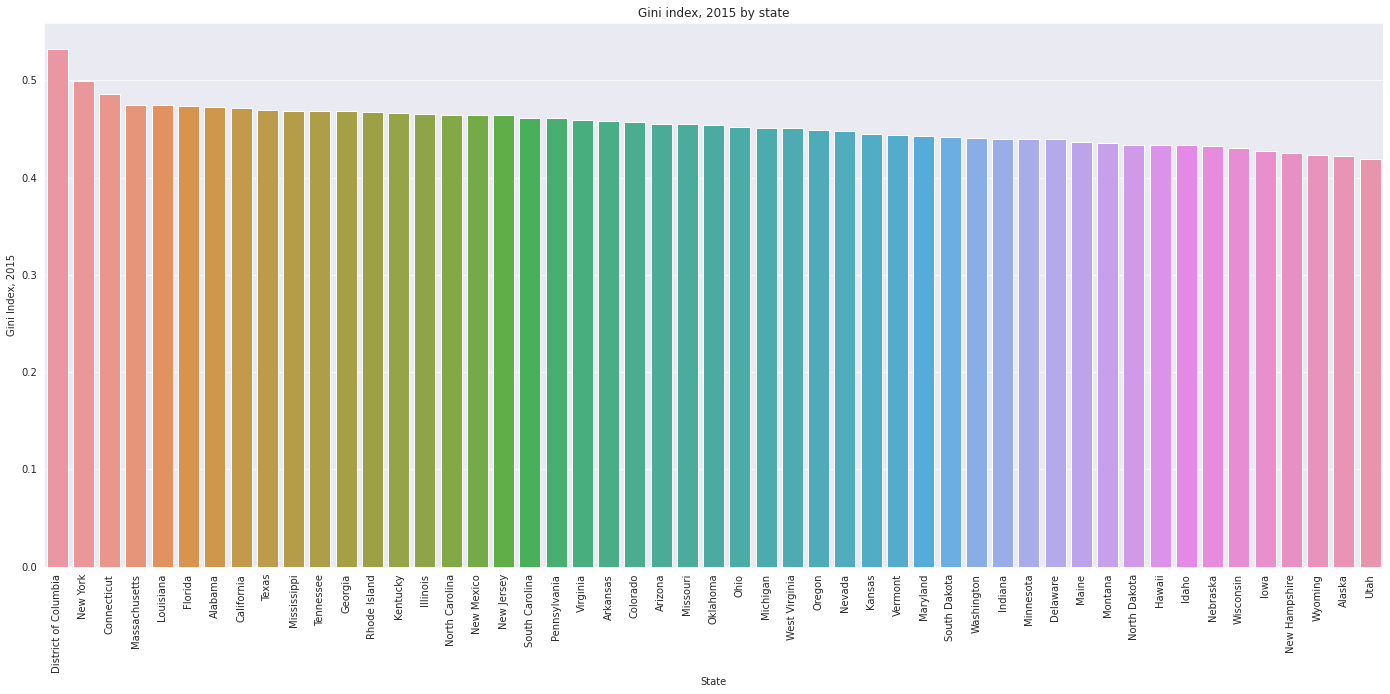

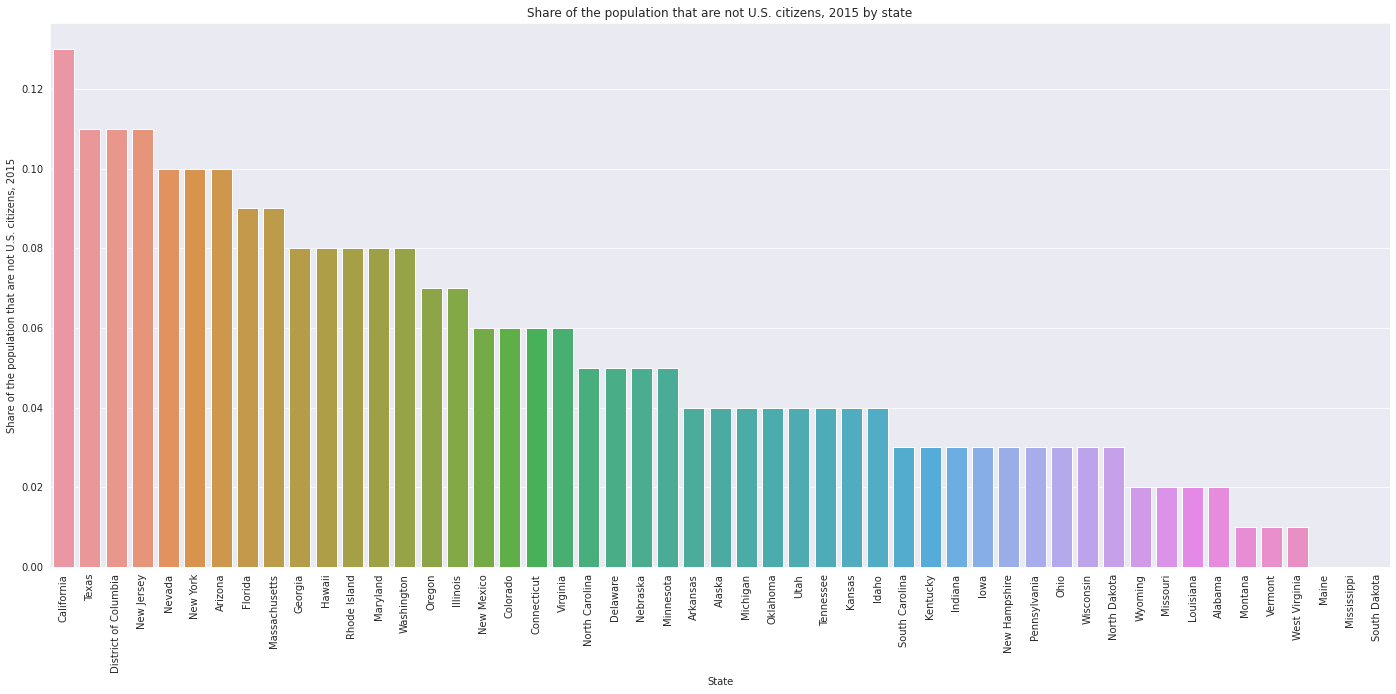

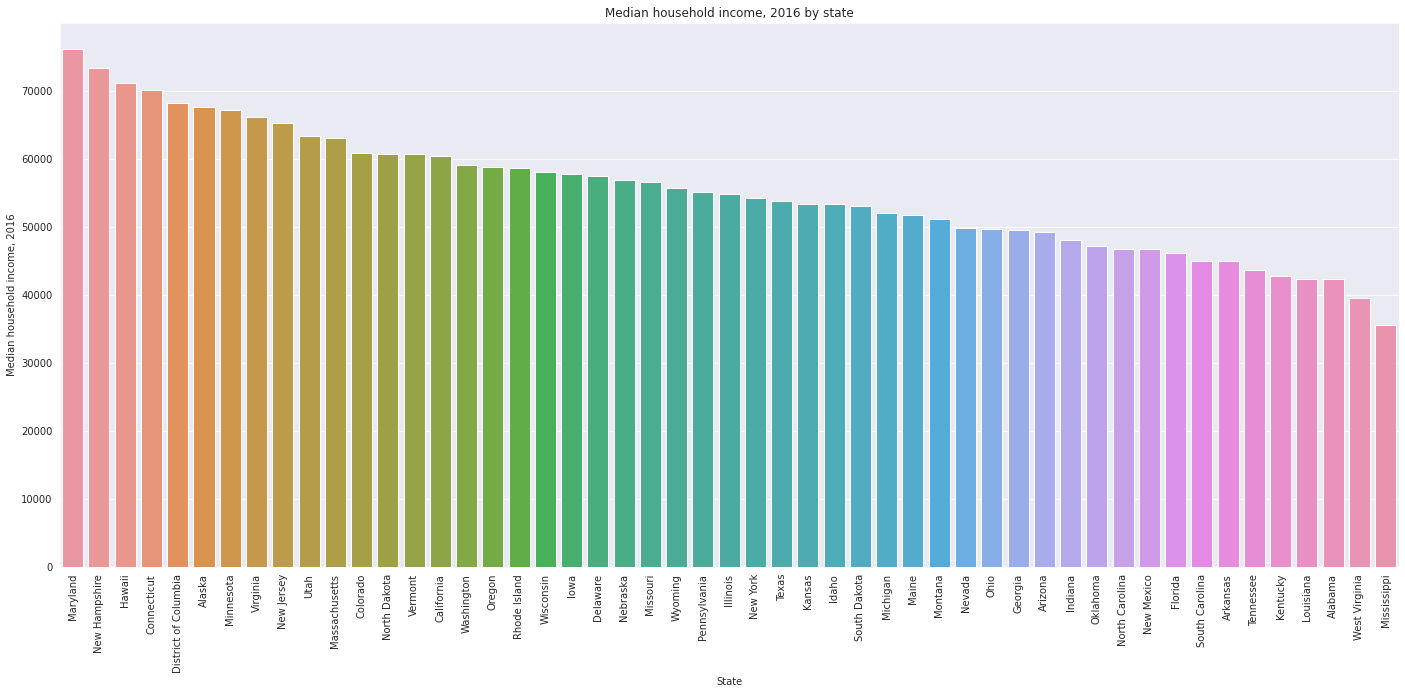

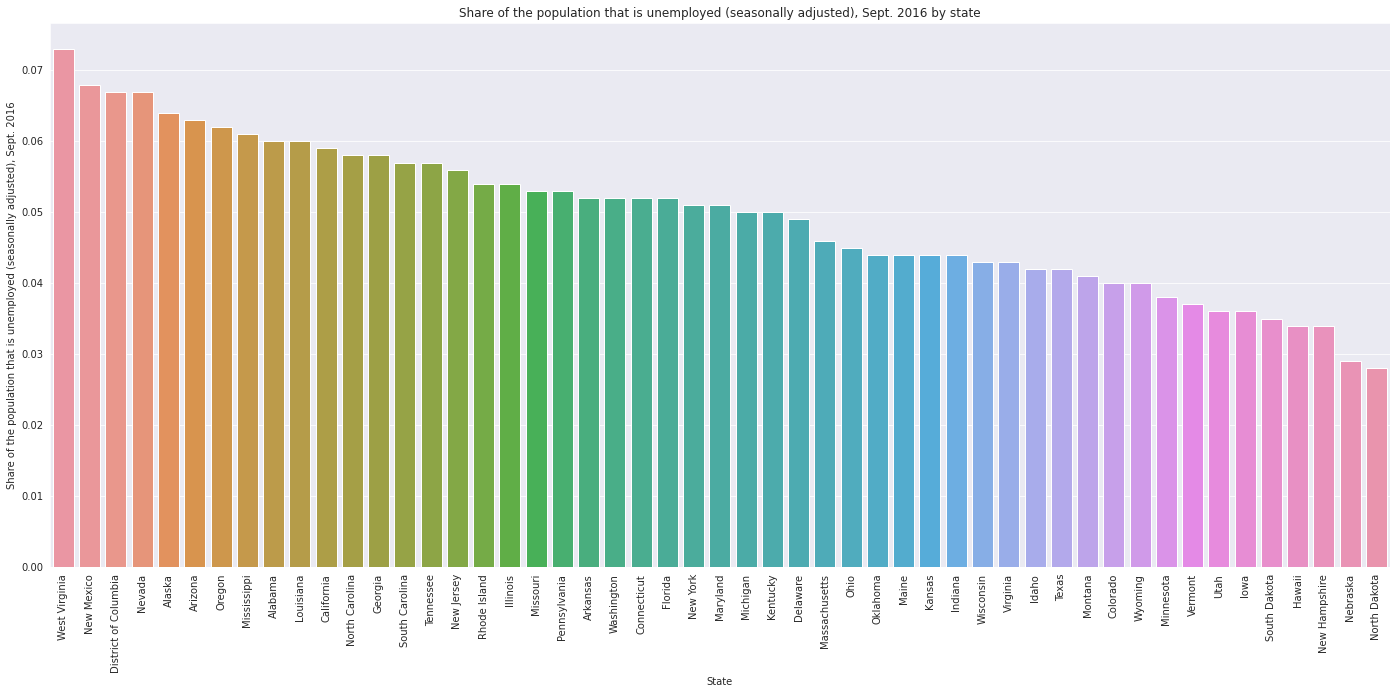

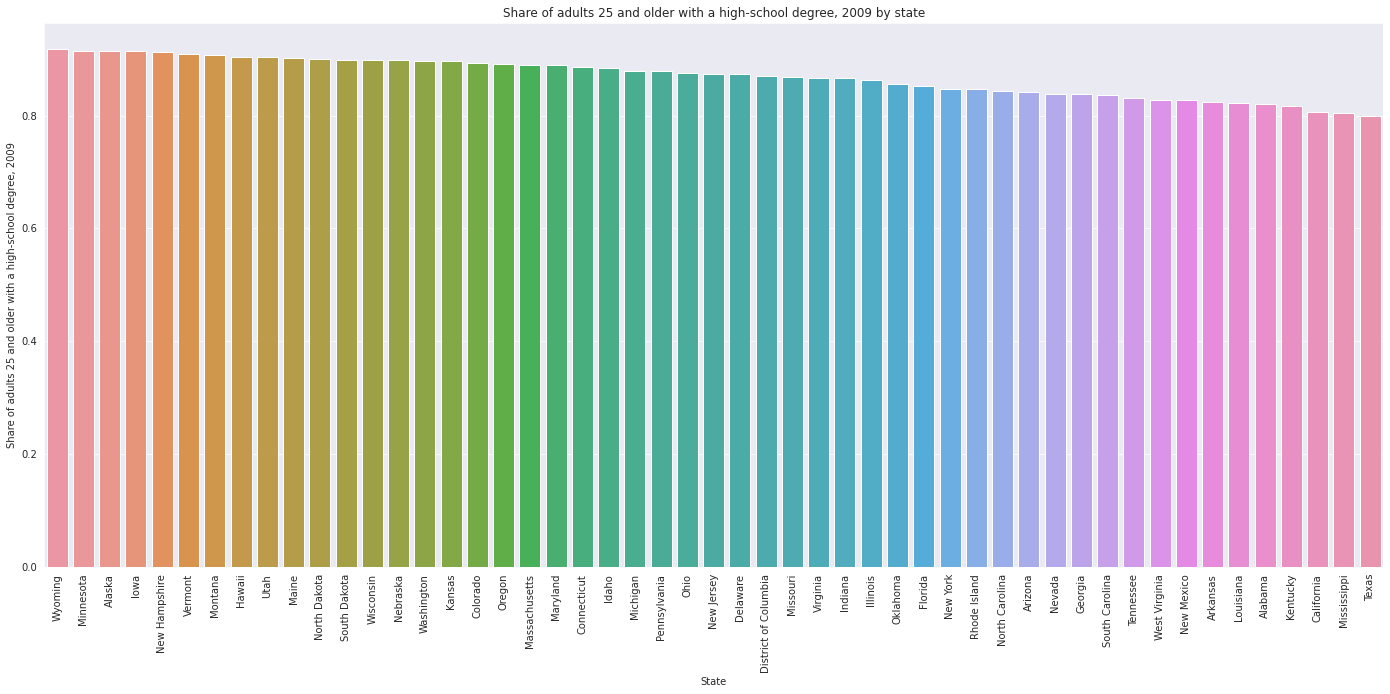

In [ ]:
state_list=list(hatecrimes.state.unique())
hatecrimesrate=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.hate_crimes_per_100k_splc)/len(x)
    hatecrimesrate.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'hatecrimesrate':hatecrimesrate})
new_index=df1.hatecrimesrate.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.hatecrimesrate)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016')
plt.title('Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016 by state')


state_list=list(hatecrimes.state.unique())
hatecrimesratefbi=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.avg_hatecrimes_per_100k_fbi)/len(x)
    hatecrimesratefbi.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'hatecrimesratefbi':hatecrimesratefbi})
new_index=df1.hatecrimesratefbi.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.hatecrimesratefbi)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average annual hate crimes per 100,000 population, FBI, 2010-2015')
plt.title('Average annual hate crimes per 100,000 population, FBI, 2010-2015 by state')

state_list=list(hatecrimes.state.unique())
giniindexrate=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.gini_index)/len(x)
    giniindexrate.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'giniindexrate':giniindexrate})
new_index=df1.giniindexrate.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.giniindexrate)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Gini Index, 2015')
plt.title('Gini index, 2015 by state')

state_list=list(hatecrimes.state.unique())
citzenrate=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.share_non_citizen)/len(x)
    citzenrate.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'citzenrate':citzenrate})
new_index=df1.citzenrate.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.citzenrate)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Share of the population that are not U.S. citizens, 2015')
plt.title( 'Share of the population that are not U.S. citizens, 2015 by state')

state_list=list(hatecrimes.state.unique())
medianincome=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.median_household_income)/len(x)
    medianincome.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'medianincome':medianincome})
new_index=df1.medianincome.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.medianincome)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Median household income, 2016')
plt.title( 'Median household income, 2016 by state')


state_list=list(hatecrimes.state.unique())
unemplo=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.share_unemployed_seasonal)/len(x)
    unemplo.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'unemplo': unemplo})
new_index=df1.unemplo.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.unemplo)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Share of the population that is unemployed (seasonally adjusted), Sept. 2016')
plt.title( 'Share of the population that is unemployed (seasonally adjusted), Sept. 2016 by state')


state_list=list(hatecrimes.state.unique())
degreerate=[]

for i in region_list:
    x=hatecrimes[hatecrimes.state==i]
    state_rate=sum(x.share_population_with_high_school_degree)/len(x)
    degreerate.append(state_rate)

df1=pd.DataFrame({'state_list':state_list,'degreerate': degreerate})
new_index=df1.degreerate.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.state_list,y=sorted_data.degreerate)

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Share of adults 25 and older with a high-school degree, 2009')
plt.title( 'Share of adults 25 and older with a high-school degree, 2009 by state')




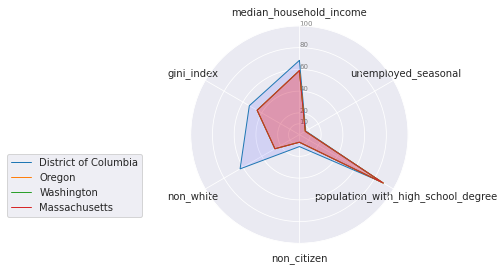

In [55]:
# Set data
df = pd.DataFrame({
'group': ['District Of Columbia','Oregon','Washington','Massachusetts'],
'median_household_income': [68.277, 58.875, 59.068, 63.151],
'unemployed_seasonal': [6.7, 6.2, 5.2, 4],
'population_with_high_school_degree': [87.1, 89.1, 89.7, 89],
'non_citizen': [11, 7, 8, 9],
'non_white': [63, 26, 31, 27],
'gini_index': [53.2, 44.9, 44.1, 47.5],
})
 



# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,40,60,80,100], ["10","20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="District of Columbia")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Oregon")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values= df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Washington")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values= df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Massachusetts")
ax.fill(angles, values, 'r', alpha=0.1)
 
 
# Add legend
plt.legend(loc='lower right', bbox_to_anchor=(-0.20, 0.1))





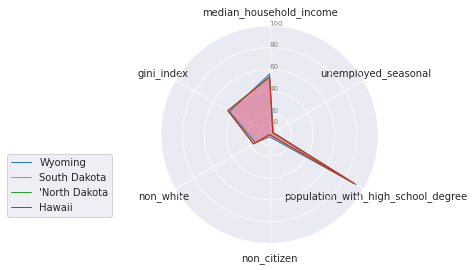

In [57]:
# Set data
df2 = pd.DataFrame({
'group1': ['Wyoming','South Dakota','North Dakota','Hawaii'],
'median_household_income': [55.690, 53.053, 60.730, 71.233],
'unemployed_seasonal': [4, 3.5, 2.8, 3.4],
'population_with_high_school_degree': [91.8, 89.9, 90.1, 90.4],
'non_citizen': [2, 0, 3, 8],
'non_white' : [15, 17, 15, 81],
'gini_index': [42.3, 44.2, 44.1, 43.3],})
 



# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,40,60,80,100], ["10","20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= df2.loc[0].drop('group1').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Wyoming")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= df2.loc[1].drop('group1').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="South Dakota")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values= df2.loc[1].drop('group1').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="'North Dakota")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values= df2.loc[1].drop('group1').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Hawaii")
ax.fill(angles, values, 'r', alpha=0.1)
 
 

plt.legend(loc='lower right', bbox_to_anchor=(-0.20, 0.1))

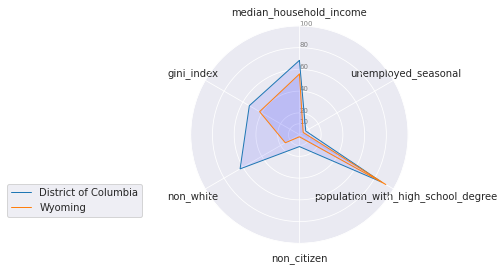

In [58]:
# Set data
df = pd.DataFrame({
'group': ['District Of Columbia','Oregon','Washington','Massachusetts'],
'median_household_income': [68.277, 58.875, 59.068, 63.151],
'unemployed_seasonal': [6.7, 6.2, 5.2, 4],
'population_with_high_school_degree': [87.1, 89.1, 89.7, 89],
'non_citizen': [11, 7, 8, 9],
'non_white': [63, 26, 31, 27],
'gini_index': [53.2, 44.9, 44.1, 47.5],
})
 



# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,40,60,80,100], ["10","20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="District of Columbia")
ax.fill(angles, values, 'b', alpha=0.1)
 

 
 
# Add legend
plt.legend(loc='lower right', bbox_to_anchor=(-0.20, 0.1))

# Set data
df2 = pd.DataFrame({
'group1': ['Wyoming','South Dakota','North Dakota','Hawaii'],
'median_household_income': [55.690, 53.053, 60.730, 71.233],
'unemployed_seasonal': [4, 3.5, 2.8, 3.4],
'population_with_high_school_degree': [91.8, 89.9, 90.1, 90.4],
'non_citizen': [2, 0, 3, 8],
'non_white' : [15, 17, 15, 81],
'gini_index': [42.3, 44.2, 44.1, 43.3],})
 



# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,40,60,80,100], ["10","20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values= df2.loc[0].drop('group1').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Wyoming")
ax.fill(angles, values, 'b', alpha=0.1)
 

 

plt.legend(loc='lower right', bbox_to_anchor=(-0.20, 0.1))









In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = hatecrimes
df.head()

df['text'] = df['hate_crimes_per_100k_splc'] + '<br>Hate Crimes ' + (df['pop']/1e6).astype(str)+' per 100k'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

UFuncTypeError: ignored

**4**. Analise a correlação linear entre as variáveis quantitativas:
+ 4.1  Apresente a matriz de correlação entre todas as variáveis quantitativas.
+ 4.2  Resuma a matriz de correlação na forma de figura com cores para correlações e comente o resultado.

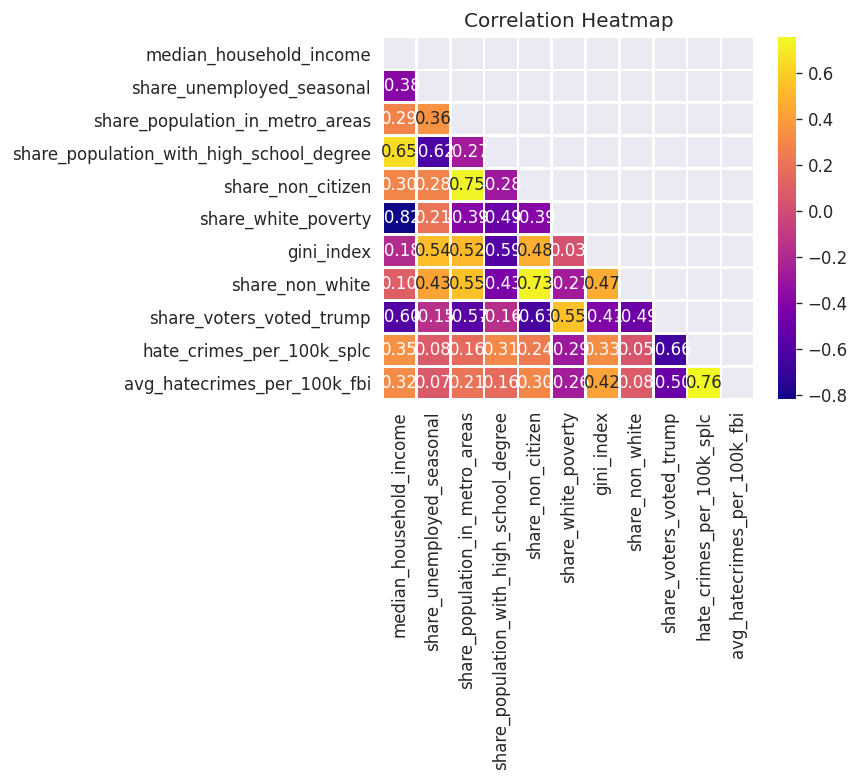

In [ ]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(hatecrimes.corr(),dtype = bool))
sns.heatmap(hatecrimes.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()